In [1]:
# get regulon memberships
# get DEG union
# define regulon activity based on DEGs

In [2]:
import os
import matplotlib, matplotlib.pyplot

# 0. user-defined variables

In [3]:
DEG_folder = '/Users/alopez/projects_isb/cdi/results/deseq2/filtered/'
regulon_memberships_file = '/Users/alopez/projects_isb/cdi/results/miner/results_IA9/mechanistic_inference_results/regulons_annotated.csv'

# 1. get DEG union

In [4]:
degs = []

files = os.listdir(DEG_folder)
deg_files = [DEG_folder+file for file in files if '.tsv' in file]

for file in deg_files:
    with open(file, 'r') as f:
        next(f)
        for line in f:
            v = line.split('\t')
            deg = v[0]
            if deg not in degs:
                degs.append(deg)
                
print('DEG found: {}'.format(len(degs)))

DEG found: 1967


# 2. get regulon memberships

In [5]:
regulon_memberships = {} 
with open(regulon_memberships_file, 'r') as f:
    next(f)
    for line in f:
        v = line.split(',')
        regulon_id = int(v[1])
        regulator = v[2]
        gene = v[3].replace('\n', '')
        identifier = (regulon_id, regulator)
        
        if identifier not in regulon_memberships:
            regulon_memberships[identifier] = [gene]
        else:
            regulon_memberships[identifier].append(gene)
print('regulon memberships for {} regulons'.format(len(regulon_memberships)))

regulon memberships for 3695 regulons


# 3. define regulon activity based on DEGs

## 3.1. define the regulons that have at least one DEG

1 (204, 'ENSG00000101412')
2 (409, 'ENSG00000128604')
3 (432, 'ENSG00000173253')
4 (1355, 'ENSG00000168310')
5 (1464, 'ENSG00000068323')
6 (1492, 'ENSG00000143799')
7 (1517, 'ENSG00000170365')
8 (1669, 'ENSG00000099326')
9 (1986, 'ENSG00000185507')
10 (2060, 'ENSG00000169689')
11 (2423, 'ENSG00000213928')
12 (2560, 'ENSG00000185670')
13 (2886, 'ENSG00000090447')
14 (2900, 'ENSG00000162676')
15 (2917, 'ENSG00000197063')
16 (3215, 'ENSG00000136630')
17 (3235, 'ENSG00000177606')
18 (3255, 'ENSG00000102974')
19 (3451, 'ENSG00000196712')
20 (3550, 'ENSG00000161940')
21 (3665, 'ENSG00000198081')


Text(0, 0.5, 'DEGs in regulon')

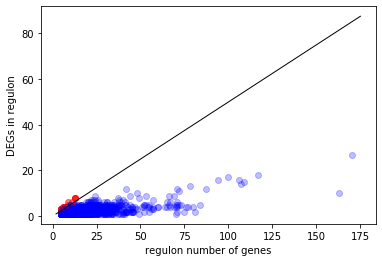

In [8]:
count = 0
for regulon_identifier in regulon_memberships:
    a = len(list(set(degs) & set(regulon_memberships[regulon_identifier])))
    b = len(regulon_memberships[regulon_identifier])
    proportion = a/b
    if proportion > 0.5:
        count = count + 1
        matplotlib.pyplot.plot(b, a, 'o', color='red', alpha=0.5)
        print(count, regulon_identifier)
    elif proportion > 0:
        matplotlib.pyplot.plot(b, a, 'o', color='blue', alpha=0.25)
        
matplotlib.pyplot.plot([2,175], [1,175/2], '-', color='black', lw=1)
matplotlib.pyplot.xlabel('regulon number of genes')
matplotlib.pyplot.ylabel('DEGs in regulon')